In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def newton_paphson(f,Df,x0,tol,max_iter):
    newtonIter=[]
    newton=[]
    t = max_iter
    while max_iter > 0 and np.linalg.norm(f(x0)) > tol:
        dx = calcul_etape(Df,f,x0)
        x0 = x0+dx
        max_iter -=1
        newton.append(np.linalg.norm(f(x0)))
        newtonIter.append(t-max_iter)
    return x0, newtonIter, newton

In [ ]:
x , t, v = newton_paphson(f,Df,[1/2, 1/2],1e-5,100)
x, t

ValueError: too many values to unpack (expected 2)

In [ ]:
x , t = newton_paphson(f,Df,[-1/2, 1/2],1e-5,100)
x, t

In [5]:
def calcul_etape(Df,f,x0):
    return -np.linalg.solve(Df(x0), f(x0))


In [6]:
Df = lambda x:np.array([ 
    [2*x[0],2*x[1]],
    [2*x[0], -1]
])
f = lambda x : np.array(
    [x[0]*x[0] + x[1]*x[1] -1, 
     x[0]*x[0] - x[1] ]
)

# Exercice 3:

In [45]:
f = lambda x:np.array([-np.cos(x[0])/81 + x[1]*x[1]/9 + np.sin(x[2])/3 -x[0],
                       np.sin(x[0])/3 + np.cos(x[2])/3 - x[1],
                      -np.cos(x[0])/9 + x[1]/3 + np.sin(x[2])/6 - x[2]])
g = lambda x:np.array([-np.cos(x[0])/81 + x[1]*x[1]/9 + np.sin(x[2])/3,
                       np.sin(x[0])/3 + np.cos(x[2])/3,
                      -np.cos(x[0])/9 + x[1]/3 + np.sin(x[2])/6])

In [70]:
#qst1
def point_fixe(g,x0,tol,max_iter):
    pf = []
    pfIter = []
    t = max_iter
    while max_iter > 0 and np.linalg.norm(f(x0)) > tol :
        x0 = g(x0)
        max_iter -= 1
        pf.append(np.linalg.norm(f(x0)))
        pfIter.append(t - max_iter)
    return x0, pfIter, pf

In [9]:
#qst2
Dg = lambda x:np.array([[np.sin(x[0]/81),2*x[1]/9,np.cos(x[2])/3],
                        [np.cos(x[0])/3,0,-np.sin(x[2])/3],
                        [np.sin(x[0])/9,1/3,np.cos(x[2])/6]])
#qst2
Df = lambda x:np.array([[np.sin(x[0]/81)-1,2*x[1]/9,np.cos(x[2])/3],
                        [np.cos(x[0])/3,-1,-np.sin(x[2])/3],
                        [np.sin(x[0])/9,1/3,np.cos(x[2])/6 - 1]])

max(abs(np.linalg.eigvals(Dg([0,1/3,0]))))

0.4161258232947674

In [74]:
#qst3
x, newtonIter, newton = newton_paphson(f,Df,[0,1,1],1e-5,1000)
y, pfIter, pf = point_fixe(g,[0,1,1],1e-5,1000)


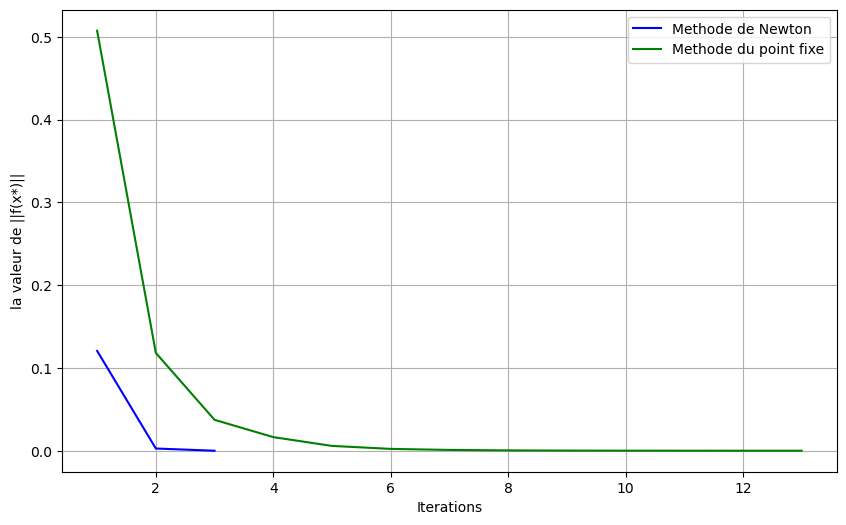

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(newtonIter, newton, label='Methode de Newton', color='b')
plt.plot(pfIter, pf, label='Methode du point fixe', color='g')  
plt.xlabel('Iterations')
plt.ylabel('la valeur de ||f(x*)||')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
h = lambda x:np.array([2*x[0]-x[1]+np.exp(x[0]), -x[0]+2*x[1]+np.exp(x[1])])

Dh = lambda x:np.array([[2+np.exp(x[0]),-1],[-1,2+np.exp(x[1])]])

In [83]:
x, newtonIter, newton = newton_paphson(h,Dh,[0,0],1e-20,10000)

In [84]:
x, h(x)

(array([-0.56714329, -0.56714329]), array([0., 0.]))